In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image

%matplotlib inline


In [2]:
_METRICS_FILE = './files/benchmark'
_METRIC = 'train_time_s'

## Read file with metrics

In [3]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")


In [4]:
metrics['total_time_s'] = metrics.apply(lambda row: row['train_time_s']+row['test_time_s'], axis=1)

In [5]:
metrics.sample(5)

,dataset,classifier,total,tp,tn,fp,fn,precision,recall,f1,fbeta,accuracy,train_time_s,test_time_s,total_time_s
1000,Lightning2,sklearn_PassiveAggressiveClassifier,111.0,4.428571,1.714286,1.285714,1.285714,0.657143,0.673469,0.611642,0.660740,0.614286,0.003294,0.001945,0.005238
2527,ozone,sklearn_BernoulliNB,2524.0,0.145161,8.810484,0.520161,0.500000,0.072849,0.084073,0.897779,0.067224,0.897984,0.070367,0.029819,0.100185
365,ECG200,MOA_ASHoeffdingTree,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792528,0.002258,0.001514,0.003771
618,FiftyWords,MOA_WeightedMajorityAlgorithm,905.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.412926,2.902187,1.976550,4.878738
681,FordA,sklearn_PassiveAggressiveClassifier,4911.0,2.585216,2.390144,2.468172,2.537988,0.514049,0.505274,0.498996,0.479563,0.499384,0.265321,0.152581,0.417902


## Useful variables

In [6]:
family_label = {'NN'  : 'Neural_Network',
                'LM'  : 'Linear_Model',
                'NB'  : 'Naive_Bayes',
                'DC'  : 'Dummy_Classifier',
                'DT'  : 'Decision_Trees',
                'MC'  : 'Meta_Classifier',
               }
classifier_family = {'keras_parallel_3_Dilated_Conv':'NN',
                   'keras_3_Dilated_Conv':'NN',
                   'sklearn_MLPClassifier':'NN',
                   'sklearn_Perceptron':'LM',
                   'sklearn_SGDClassifier':'LM',
                   'sklearn_BernoulliNB':'NB',
                   'sklearn_PassiveAggressiveClassifier':'LM',
                   'MOA_MajorityClass':'DC',
                   'MOA_RandomHoeffdingTree':'DT',
                   'MOA_NaiveBayes':'NB',
                   'MOA_SPegasos':'LM',
                   'MOA_OzaBagAdwin':'MC',
                   'MOA_OzaBoost':'MC',
                   'MOA_OzaBag':'MC',
                   'MOA_OCBoost':'MC',
                   'MOA_SingleClassifierDrift':'MC',
                   'MOA_WeightedMajorityAlgorithm':'MC',
                   'MOA_OzaBoostAdwin':'MC',
                   'MOA_Perceptron':'LM',
                   'MOA_HoeffdingAdaptiveTree':'NB',
                   'MOA_HoeffdingOptionTree':'NB',
                   'MOA_LeveragingBag':'MC',
                   'MOA_DecisionStump':'DT',
                   'MOA_OzaBagASHT':'MC',
                   'MOA_SGD':'LM',
                   'MOA_AdaHoeffdingOptionTree':'DT',
                   'MOA_ASHoeffdingTree':'DT',
                   'MOA_ActiveClassifier':'DC',
                   'MOA_HoeffdingTree':'DT'
                  }
#classifier_family = {'keras_3_Dilated_Conv':'NN',
#                   'keras_parallel_3_Dilated_Conv':'NN'
#                  }

family_classifier = {l:[k for k,v in classifier_family.items() if v == l] for l in family_label.keys()}
family_color = {'NN'  : 'k',
                'LM'  : 'b',
                'NB'  : 'g',
                'DC'  : 'y',
                'DT'  : 'r',
                'MC'  : 'm',
               }
line_style = ['-','--', '-.', ':', '>-','o--', 'x-.', '^:', 'o-','x--', '^-.', '>:', 'x-','^--', '>-.', 'o:', '^-','>--', 'o-.', 'x:']
classifier_to_compare = ['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv']


In [7]:
datasets = metrics['dataset'].unique()
classifiers = metrics['classifier'].unique()

In [8]:
directory = './files/'+_METRIC+'/'
pathlib.Path(directory).mkdir(parents=True, exist_ok=True)

## Estudio de los valores de _METRIC sin preprocesarlos

In [9]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table[list(classifier_family.keys())]
print(metrics_table.shape)

# Add mean row and save to file
metrics_table.loc['mean'] = metrics_table.mean()
metrics_table.to_csv(directory+'table_'+_METRIC+'.csv')
metrics_table = metrics_table.drop(index='mean')

metrics_table.tail()


(88, 29)


classifier,keras_parallel_3_Dilated_Conv,keras_3_Dilated_Conv,sklearn_MLPClassifier,sklearn_Perceptron,sklearn_SGDClassifier,sklearn_BernoulliNB,sklearn_PassiveAggressiveClassifier,MOA_MajorityClass,MOA_RandomHoeffdingTree,MOA_NaiveBayes,...,MOA_HoeffdingAdaptiveTree,MOA_HoeffdingOptionTree,MOA_LeveragingBag,MOA_DecisionStump,MOA_OzaBagASHT,MOA_SGD,MOA_AdaHoeffdingOptionTree,MOA_ASHoeffdingTree,MOA_ActiveClassifier,MOA_HoeffdingTree
dataset,,,,,,,,,,,,,,,,,,,,,
ozone,0.260961,53.319854,0.156426,0.042367,0.040040,0.070367,0.038532,0.000172,0.004959,0.002498,...,0.041350,0.030825,0.989335,0.004955,0.230117,0.001488,0.045039,0.028893,0.008675,0.032532
pendigits,1.470750,129.311659,0.666842,0.860883,0.830431,0.302635,0.770768,0.000679,0.026438,0.003905,...,0.272897,0.172357,2.766446,0.007438,1.259139,0.001917,0.190200,0.100712,0.021865,0.102727
pokerhand,935.430679,8863.615054,75.517362,69.036806,67.722644,28.243824,63.964592,0.045031,0.795444,0.160994,...,4.979067,8.248677,50.782038,0.321285,25.954949,0.108302,10.201128,2.005687,0.406853,2.005082
spambase,0.337766,87.486554,0.286044,0.077181,0.073673,0.140308,0.071022,0.000312,0.005098,0.003863,...,0.057975,0.100471,0.505822,0.004853,0.347717,0.001271,0.100534,0.033613,0.003160,0.037372
susy100k,22.196765,1262.024036,6.421193,1.948101,1.835411,2.972105,1.768148,0.005994,0.091684,0.031397,...,1.078693,1.655550,13.206292,0.041314,4.059368,0.017998,2.442535,0.347038,0.030621,0.372415


In [10]:
color = [family_color[classifier_family[classifier]] for classifier in classifier_family.keys()]
line = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifier_family.keys()]
style = [c+s for c,s in list(zip(color,line))]

### Plot _METRIC for each dataset

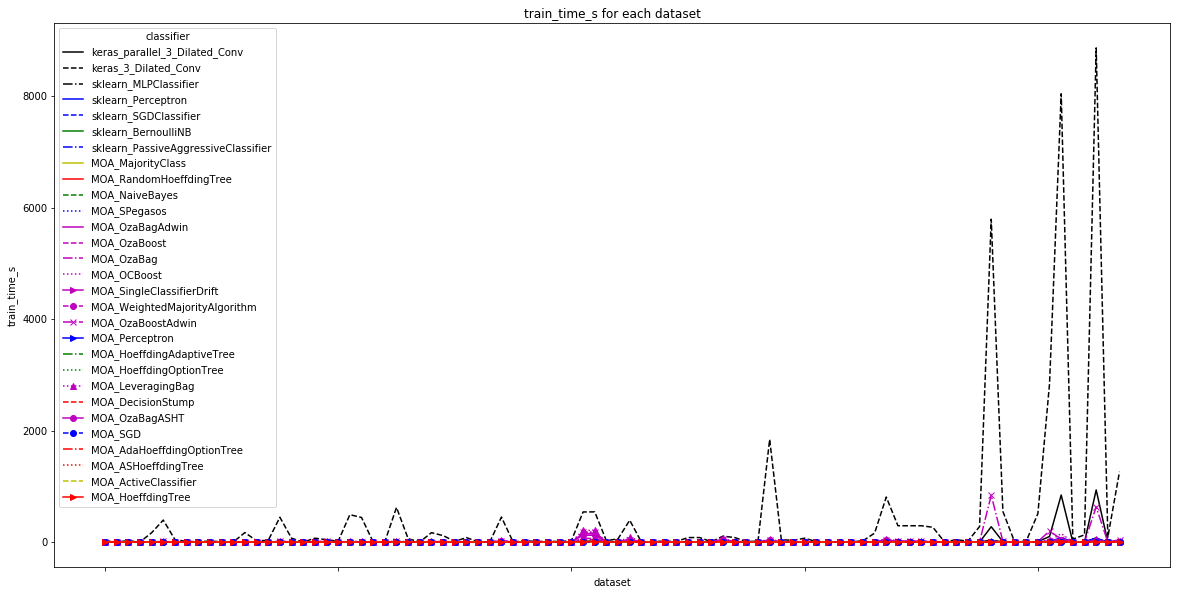

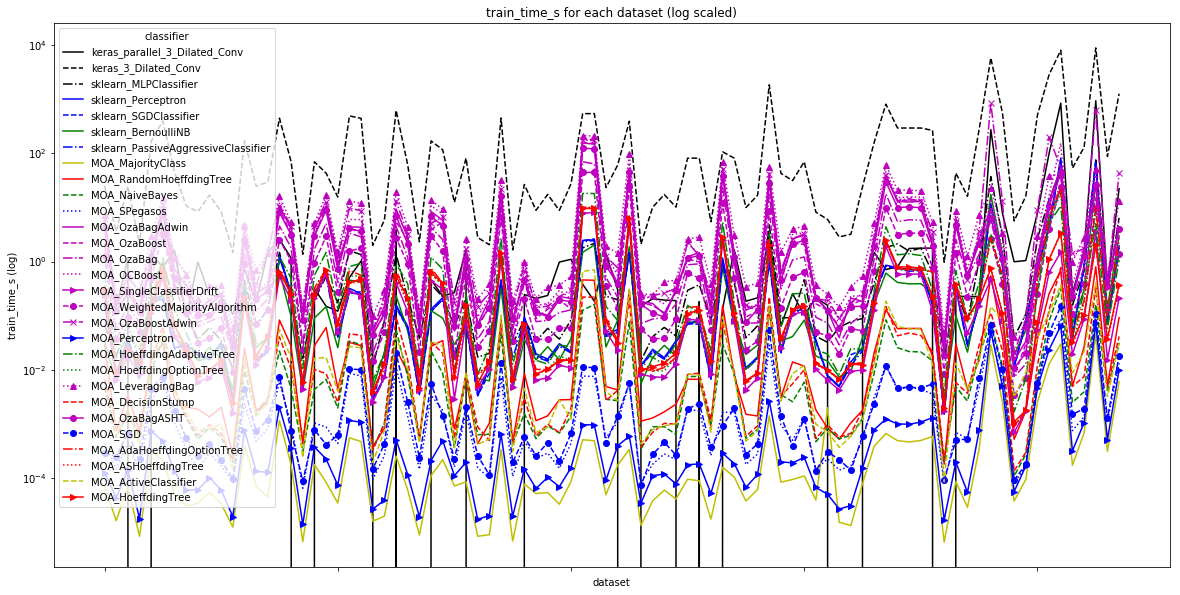

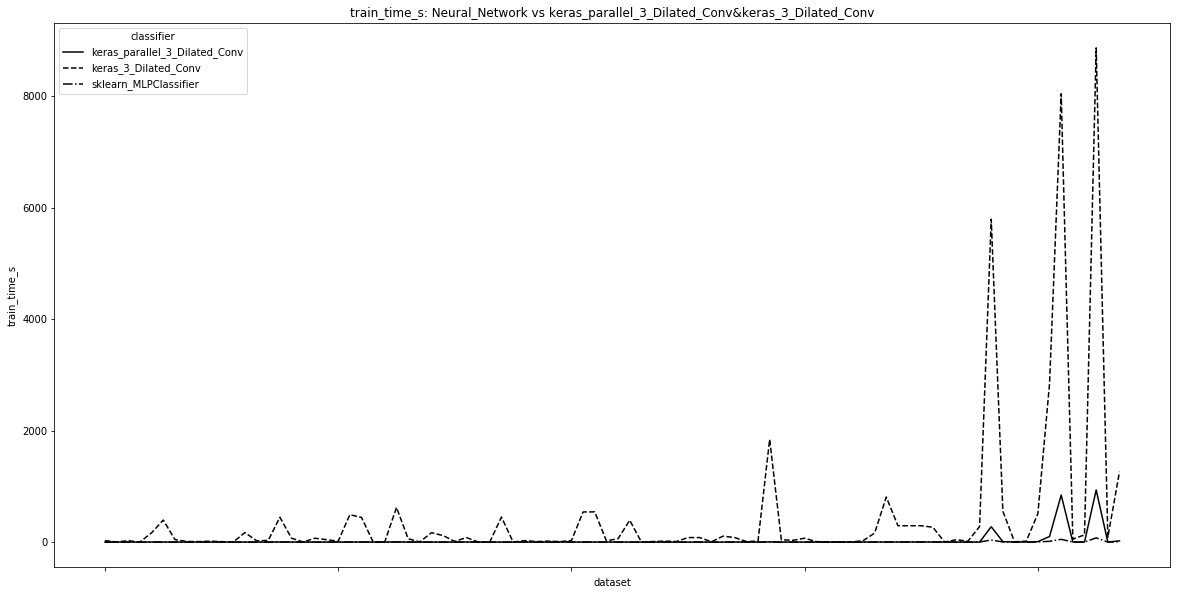

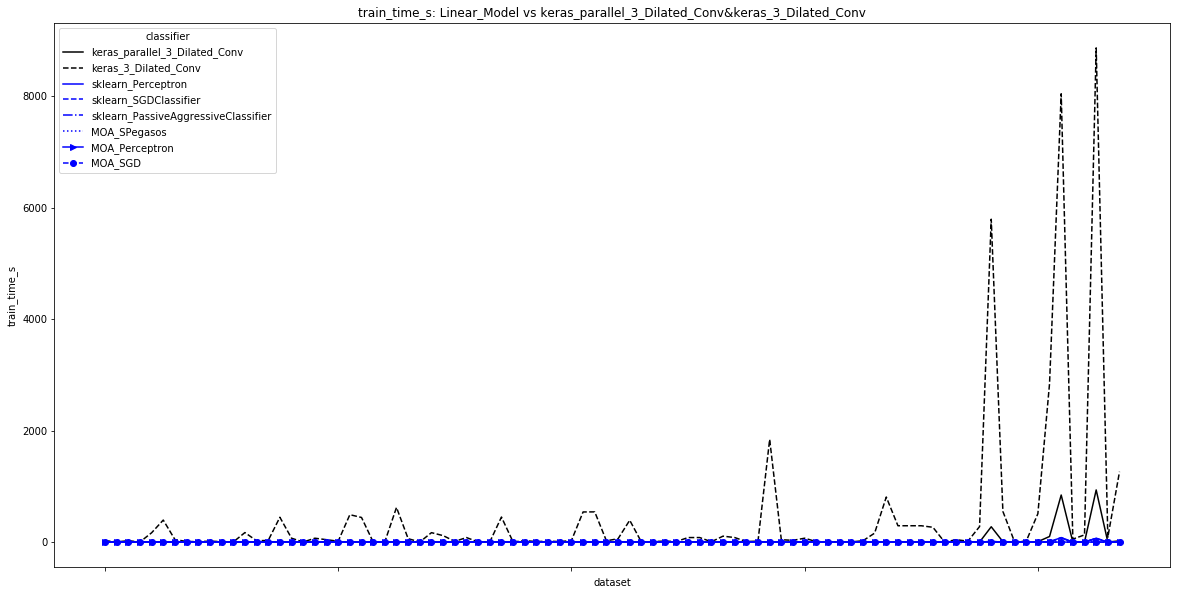

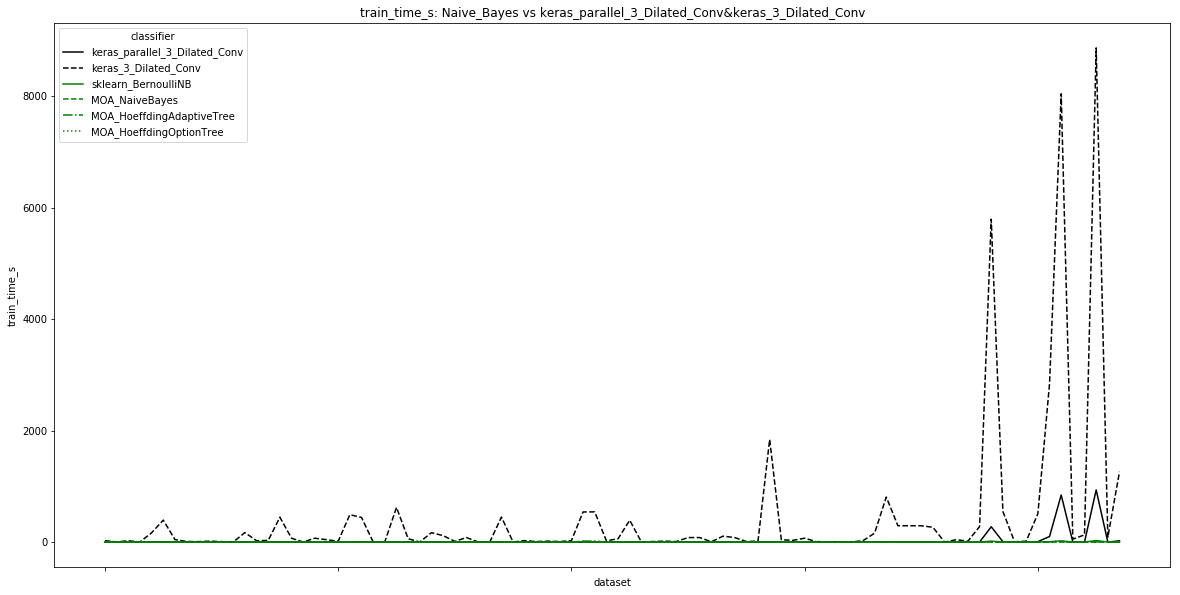

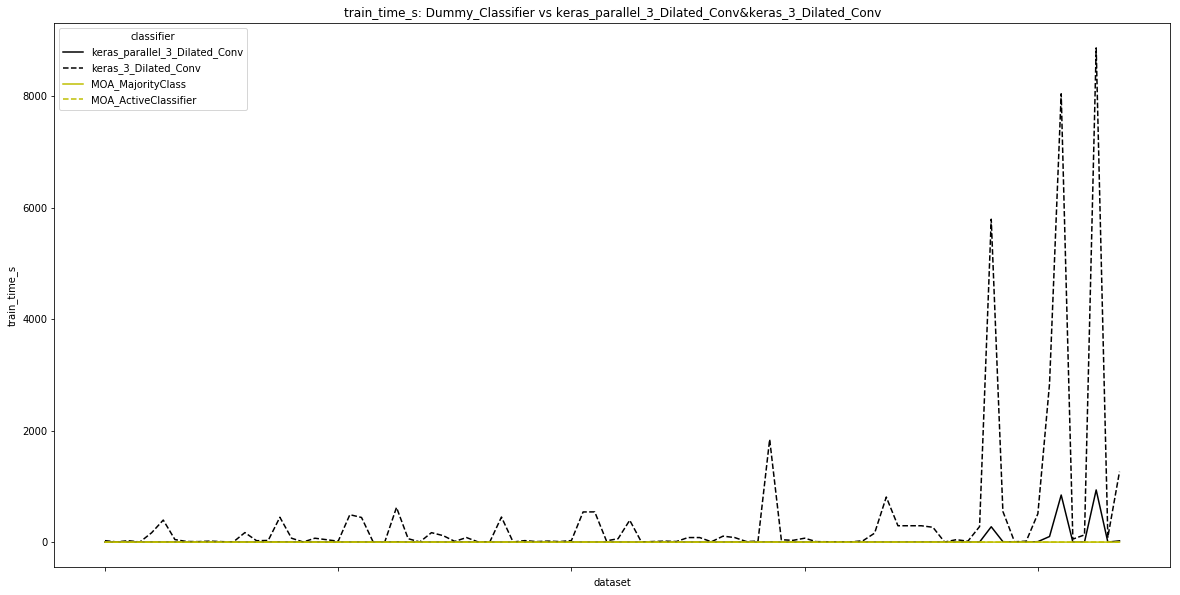

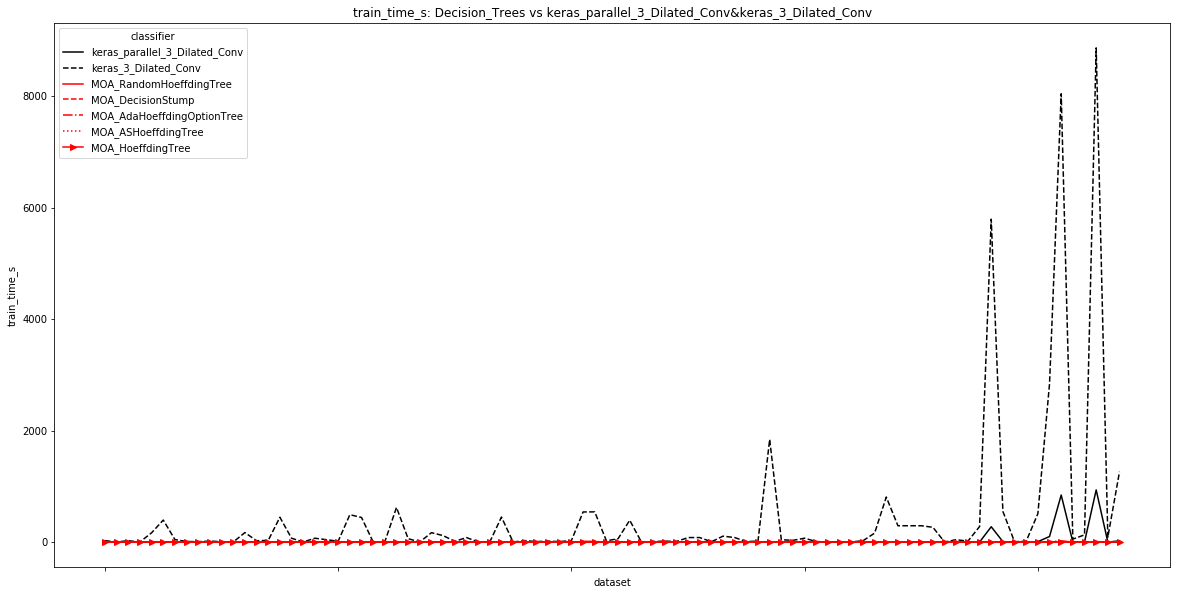

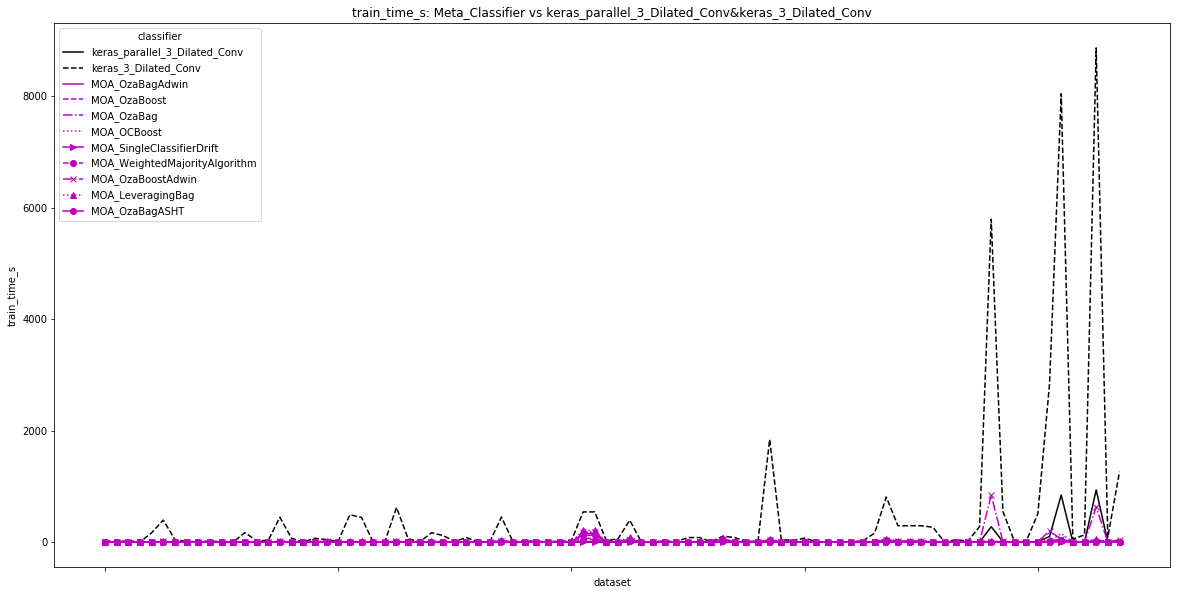

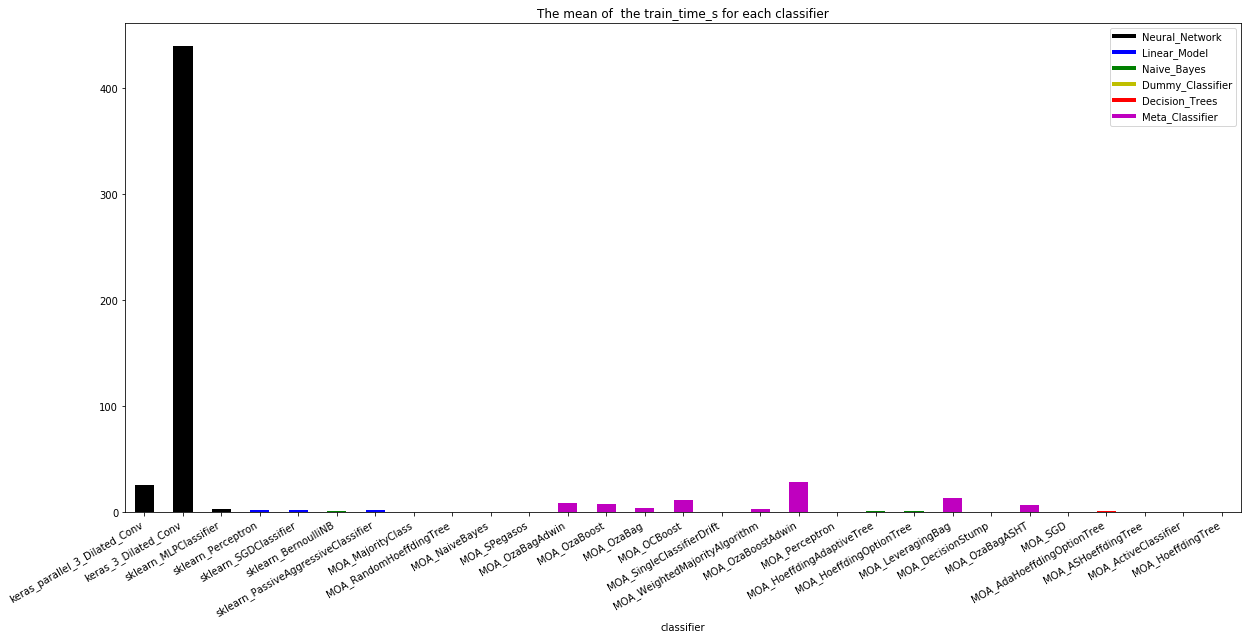

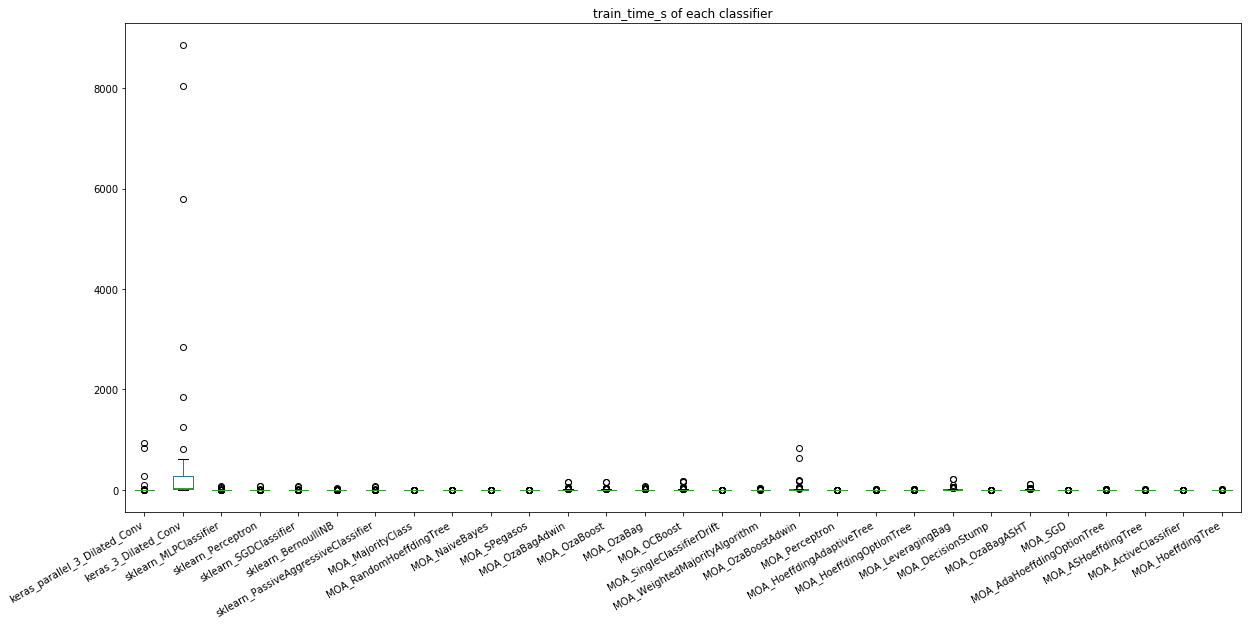

In [11]:
## Plot 
ax = metrics_table.plot(figsize=(20,10),   style=style, title= _METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot.png')
plt.show()

ax_log = metrics_table.plot(figsize=(20,10), logy=True,  style=style, title= _METRIC+' for each dataset (log scaled)' )
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log.png')
plt.show()

pdf_img_ls = [directory+'plot.png', directory+'plot_log.png' ]

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'.png')


## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean.png']
                           
#ax_log = metrics_table.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the  '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log.png']

## Box Plot 
ax = metrics_table.plot.box(figsize=(20,10), title= _METRIC+' of each classifier')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box.png']
                           
#ax_log = metrics_table.plot.box(figsize=(20,10), logy=True, title= _METRIC+'  of each classifier (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'box_log.png']

In [12]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

### We divide the value for each minimum

In [13]:
metrics_table_min = metrics_table.min(axis=1)
metrics_table_proportionate = metrics_table.divide(metrics_table_min, axis=0)

# Add mean row and save to file
metrics_table_proportionate.loc['mean'] = metrics_table_proportionate.mean()
metrics_table_proportionate.to_csv(directory+'table_'+_METRIC+'_prop.csv')
metrics_table_proportionate = metrics_table_proportionate.drop(index='mean')

metrics_table_proportionate.head()

classifier,keras_parallel_3_Dilated_Conv,keras_3_Dilated_Conv,sklearn_MLPClassifier,sklearn_Perceptron,sklearn_SGDClassifier,sklearn_BernoulliNB,sklearn_PassiveAggressiveClassifier,MOA_MajorityClass,MOA_RandomHoeffdingTree,MOA_NaiveBayes,...,MOA_HoeffdingAdaptiveTree,MOA_HoeffdingOptionTree,MOA_LeveragingBag,MOA_DecisionStump,MOA_OzaBagASHT,MOA_SGD,MOA_AdaHoeffdingOptionTree,MOA_ASHoeffdingTree,MOA_ActiveClassifier,MOA_HoeffdingTree
dataset,,,,,,,,,,,,,,,,,,,,,
Adiac,2295.143459,3.598676e+05,951.600402,2570.770105,2484.706050,490.188408,2318.442699,1.000000,421.450275,67.289522,...,8689.376180,4808.979052,1.038165e+05,95.271911,6.190978e+04,4.170179,5165.096769,4418.416707,190.677409,4266.298149
ArrowHead,8830.781611,2.234008e+05,1105.846391,518.771107,454.504688,355.352042,429.353128,1.000000,46.114669,34.651989,...,999.231987,547.015026,1.397061e+04,36.366486,7.427537e+03,15.210371,559.144230,552.246582,37.861375,563.517798
CBF,16297.277737,3.595467e+05,1057.280717,564.079682,533.405721,423.543470,518.108977,1.000000,50.279589,22.407936,...,622.540921,351.364161,8.133711e+03,24.277857,3.853760e+03,9.865988,345.205480,403.879078,29.355473,357.416859
Car,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
ChlorineConcentration,4316.501091,5.084864e+05,1122.575698,607.055478,572.888197,456.698981,553.304334,1.000000,46.213352,29.234873,...,580.056097,498.886141,9.199924e+03,43.997416,3.026456e+03,13.559227,491.286193,437.974164,36.447793,420.482330


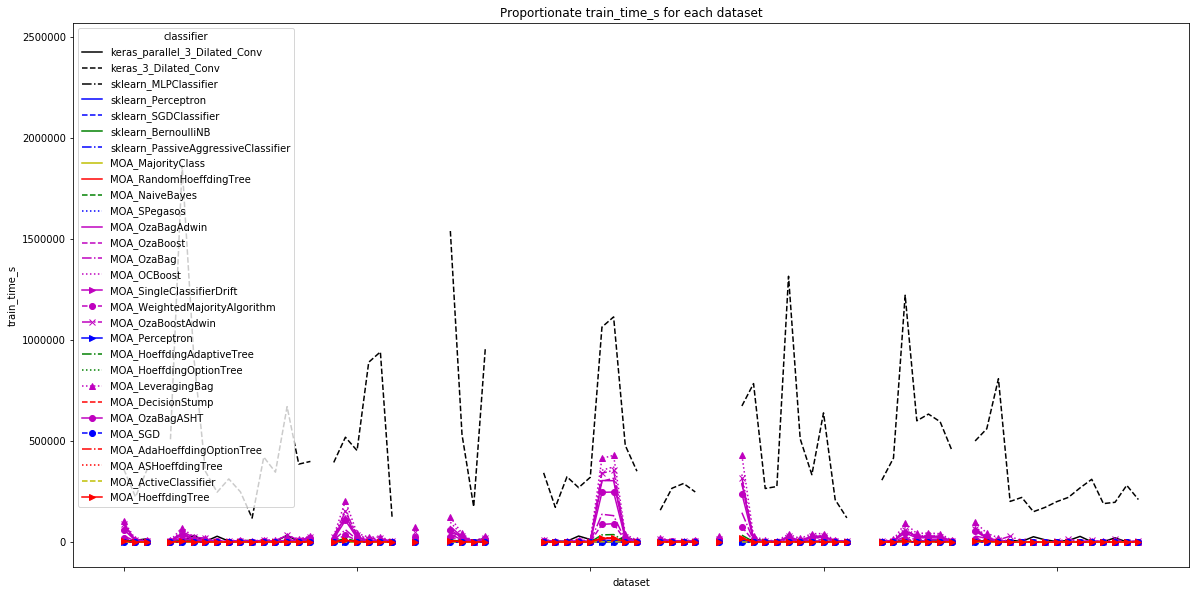

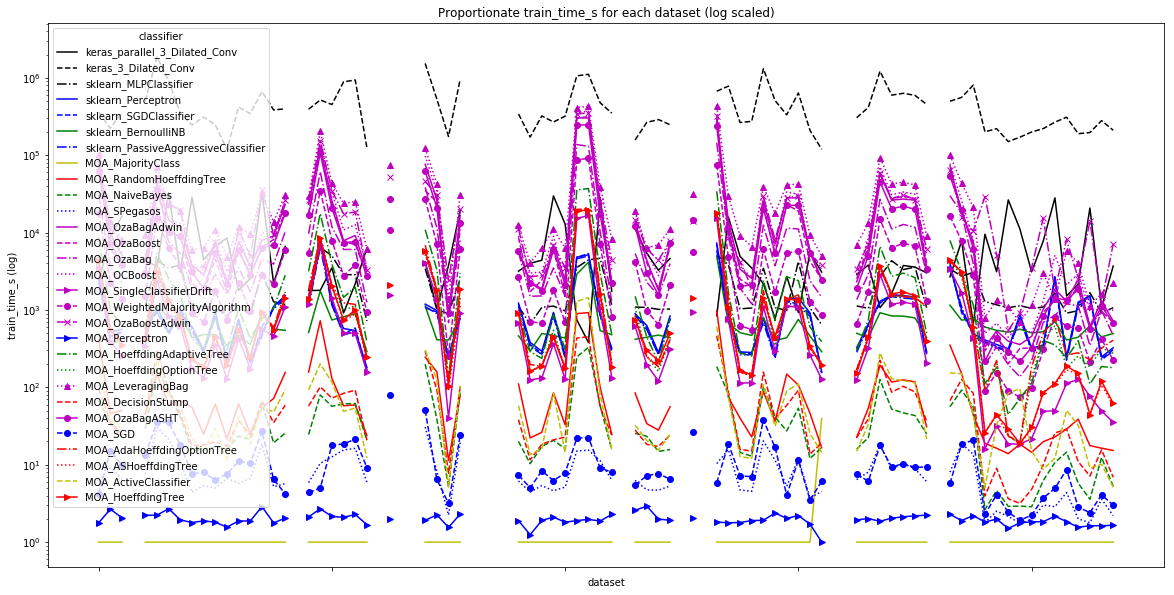

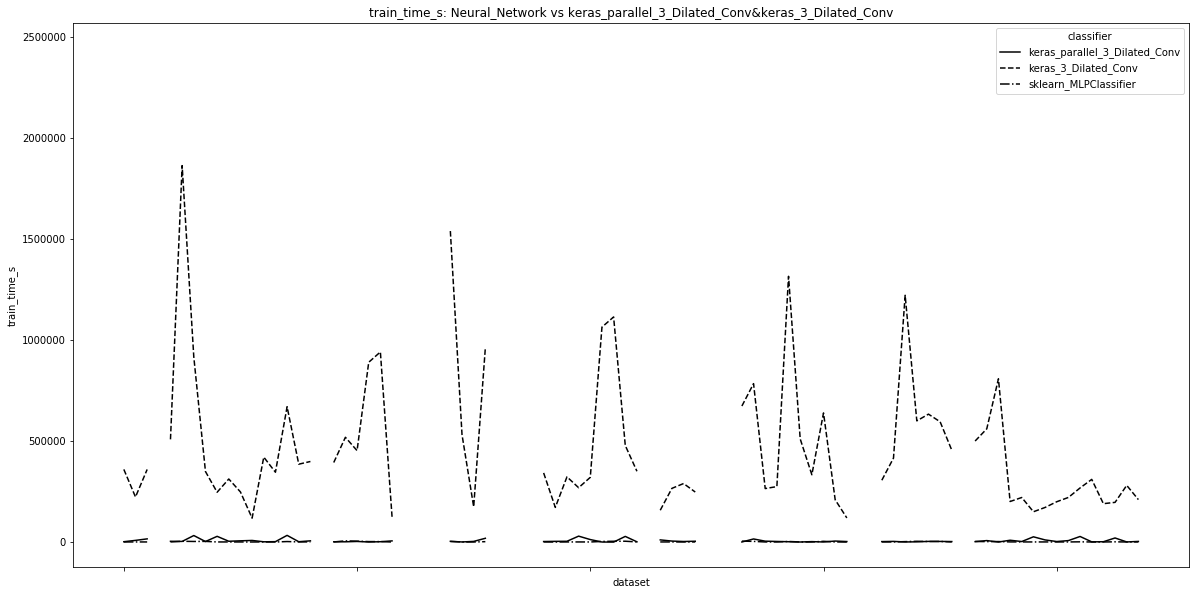

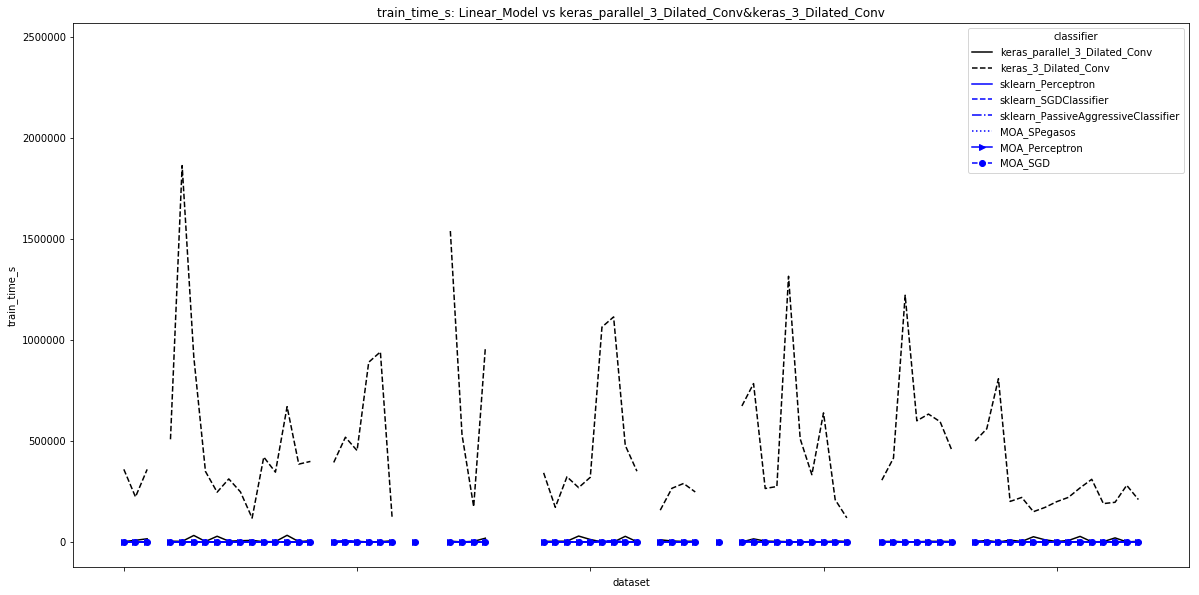

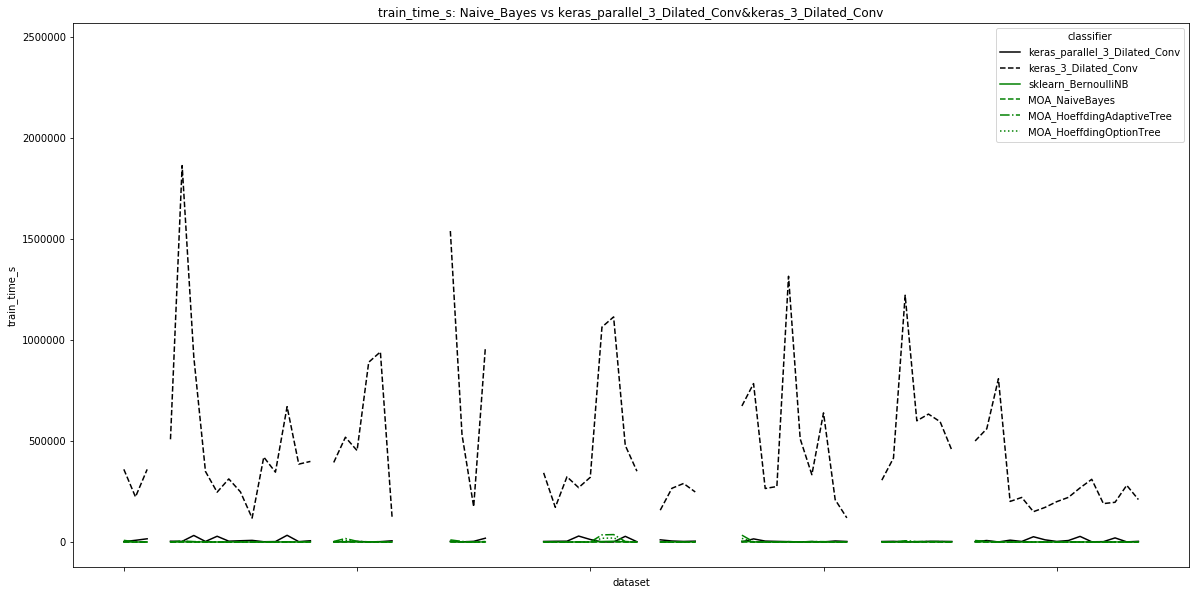

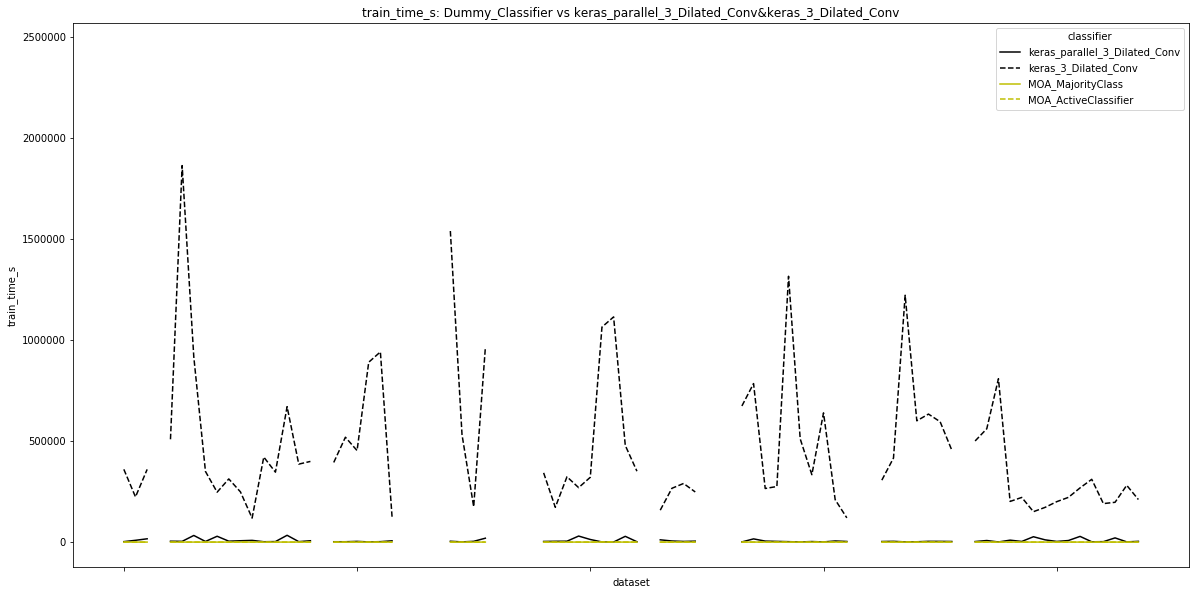

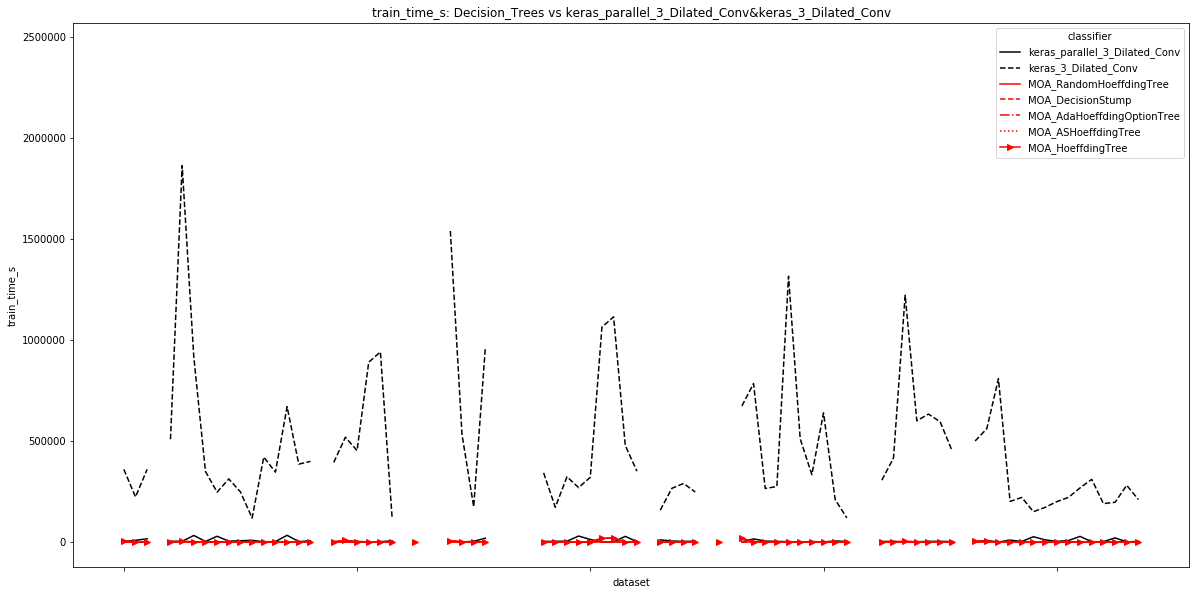

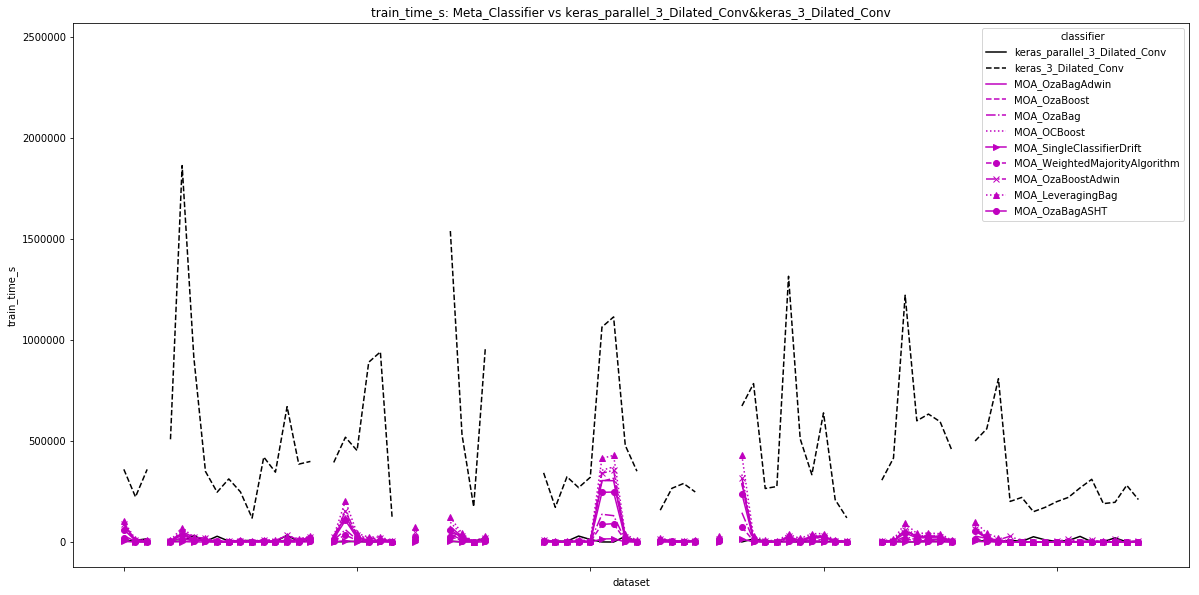

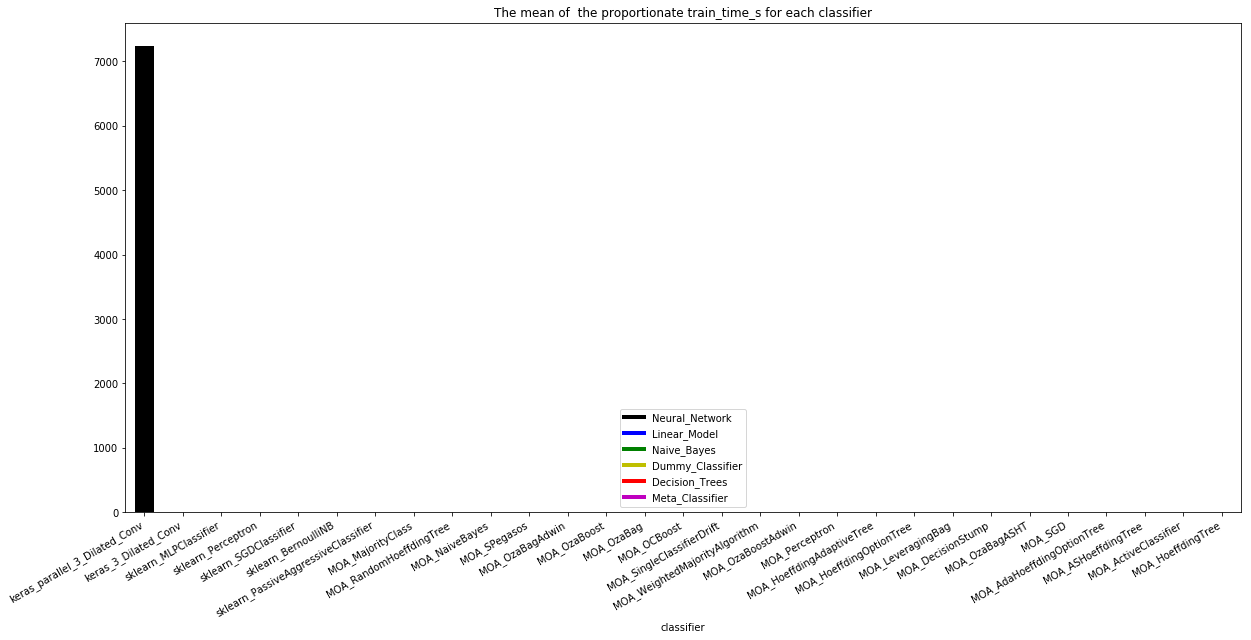

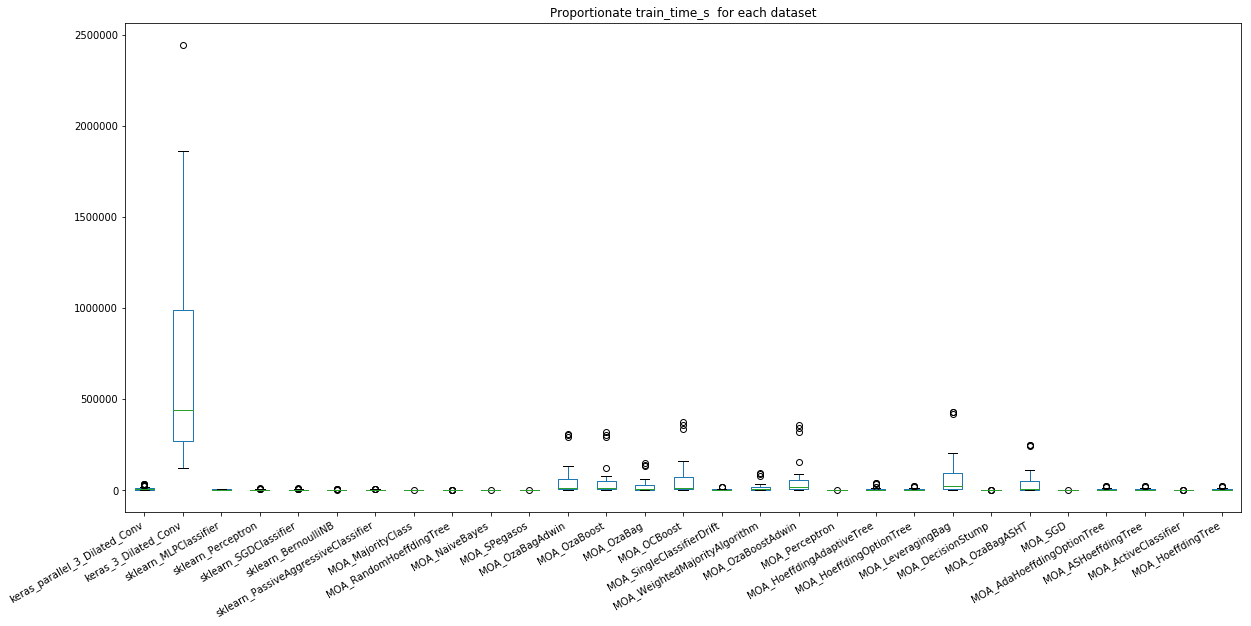

In [14]:
## Plot
ax = metrics_table_proportionate.plot(figsize=(20,10),   style=style, title= 'Proportionate '+_METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot_prop.png')
plt.show()

ax_log = metrics_table_proportionate.plot(figsize=(20,10),   style=style, title= 'Proportionate '+_METRIC+' for each dataset (log scaled)' , logy=True)
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log_prop.png')
plt.show()

pdf_img_ls = [directory+'plot_prop.png', directory+'plot_log_prop.png']

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table_proportionate[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'_prop.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'_prop.png')

## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table_proportionate.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the proportionate '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean_prop.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean_prop.png']
                           
#ax_log = metrics_table_proportionate.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the proportionate '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log_prop.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log_prop.png']

## Box Plot 
ax = metrics_table_proportionate.plot.box(figsize=(20,10), title= 'Proportionate '+_METRIC+'  for each dataset')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box_prop.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box_prop.png']
                           
#ax_log = metrics_table_proportionate.plot.box(figsize=(20,10), logy=True, title= 'Proportionate '+_METRIC+'  for each dataset (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log_prop.png')
#plt.show()
#pdf_img_ls = pdf_img_ls +  [directory+'box_log_prop.png']

## Save plots as pdf

In [15]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'_prop.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []